In [31]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [32]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [33]:
# Create a list for holding the cities.
cities = []
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [37]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [38]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | souillac
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | kargopol
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | namatanai
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | edd
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | bataipora
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | henties bay
Processing Record 18 of Set 1 | adre
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | marcona
City not found. Skipping...
Processing Record 

Processing Record 38 of Set 4 | sovetskiy
Processing Record 39 of Set 4 | krasnopillya
Processing Record 40 of Set 4 | nikolskoye
Processing Record 41 of Set 4 | madimba
Processing Record 42 of Set 4 | toamasina
Processing Record 43 of Set 4 | manta
Processing Record 44 of Set 4 | churapcha
Processing Record 45 of Set 4 | vrangel
Processing Record 46 of Set 4 | dali
Processing Record 47 of Set 4 | umm lajj
Processing Record 48 of Set 4 | mahendranagar
Processing Record 49 of Set 4 | ambatondrazaka
Processing Record 50 of Set 4 | lakes entrance
Processing Record 1 of Set 5 | georgetown
Processing Record 2 of Set 5 | sfantu gheorghe
Processing Record 3 of Set 5 | wanning
Processing Record 4 of Set 5 | bur gabo
City not found. Skipping...
Processing Record 5 of Set 5 | ambulu
Processing Record 6 of Set 5 | kapaa
Processing Record 7 of Set 5 | waipawa
Processing Record 8 of Set 5 | lokosovo
Processing Record 9 of Set 5 | tocantins
Processing Record 10 of Set 5 | acari
Processing Record 11 

Processing Record 30 of Set 8 | muyezerskiy
Processing Record 31 of Set 8 | chiredzi
Processing Record 32 of Set 8 | kemijarvi
Processing Record 33 of Set 8 | manicore
Processing Record 34 of Set 8 | jhunjhunun
Processing Record 35 of Set 8 | axim
Processing Record 36 of Set 8 | azimur
City not found. Skipping...
Processing Record 37 of Set 8 | acarau
Processing Record 38 of Set 8 | avera
Processing Record 39 of Set 8 | arlit
Processing Record 40 of Set 8 | jacareacanga
Processing Record 41 of Set 8 | aflu
City not found. Skipping...
Processing Record 42 of Set 8 | fare
Processing Record 43 of Set 8 | bonavista
Processing Record 44 of Set 8 | faya
Processing Record 45 of Set 8 | aloleng
Processing Record 46 of Set 8 | cairns
Processing Record 47 of Set 8 | grand gaube
Processing Record 48 of Set 8 | turukhansk
Processing Record 49 of Set 8 | vostok
Processing Record 50 of Set 8 | bengkulu
Processing Record 1 of Set 9 | porto torres
Processing Record 2 of Set 9 | guelengdeng
City not fo

Processing Record 14 of Set 12 | la romana
Processing Record 15 of Set 12 | heihe
Processing Record 16 of Set 12 | balabac
Processing Record 17 of Set 12 | port moresby
Processing Record 18 of Set 12 | west plains
Processing Record 19 of Set 12 | rosetta
Processing Record 20 of Set 12 | sibu
Processing Record 21 of Set 12 | mogadishu
Processing Record 22 of Set 12 | dauphin
Processing Record 23 of Set 12 | lerwick
Processing Record 24 of Set 12 | ouadda
Processing Record 25 of Set 12 | dalbandin
Processing Record 26 of Set 12 | atherton
Processing Record 27 of Set 12 | egvekinot
Processing Record 28 of Set 12 | mazatan
Processing Record 29 of Set 12 | cabrero
Processing Record 30 of Set 12 | samut songkhram
Processing Record 31 of Set 12 | kamina
Processing Record 32 of Set 12 | port-gentil
Processing Record 33 of Set 12 | seminole
Processing Record 34 of Set 12 | pervomayskiy
Processing Record 35 of Set 12 | makat
Processing Record 36 of Set 12 | adrar
Processing Record 37 of Set 12 |

In [39]:
len(city_data)

577

In [40]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Souillac,-20.5167,57.5167,75.58,83,40,6.91,MU,2022-12-19 20:28:24
1,Albany,42.6001,-73.9662,34.57,69,52,3.00,US,2022-12-19 20:24:24
2,Kodiak,57.7900,-152.4072,29.71,64,0,16.11,US,2022-12-19 20:28:24
3,Port Alfred,-33.5906,26.8910,67.17,84,97,5.99,ZA,2022-12-19 20:28:25
4,Vaini,-21.2000,-175.2000,82.56,83,40,5.75,TO,2022-12-19 20:28:25
5,Busselton,-33.6500,115.3333,65.80,55,0,9.26,AU,2022-12-19 20:28:25
6,Kargopol,61.5071,38.9456,15.73,97,100,2.66,RU,2022-12-19 20:28:26
7,Rikitea,-23.1203,-134.9692,76.96,83,100,18.19,PF,2022-12-19 20:28:26
8,Namatanai,-3.6667,152.4333,78.15,83,89,3.85,PG,2022-12-19 20:28:27
9,Ushuaia,-54.8000,-68.3000,65.82,45,0,9.22,AR,2022-12-19 20:26:50


In [41]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [42]:
city_data_df = city_data_df[new_column_order]

In [44]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Souillac,MU,2022-12-19 20:28:24,-20.5167,57.5167,75.58,83,40,6.91
1,Albany,US,2022-12-19 20:24:24,42.6001,-73.9662,34.57,69,52,3.00
2,Kodiak,US,2022-12-19 20:28:24,57.7900,-152.4072,29.71,64,0,16.11
3,Port Alfred,ZA,2022-12-19 20:28:25,-33.5906,26.8910,67.17,84,97,5.99
4,Vaini,TO,2022-12-19 20:28:25,-21.2000,-175.2000,82.56,83,40,5.75
5,Busselton,AU,2022-12-19 20:28:25,-33.6500,115.3333,65.80,55,0,9.26
6,Kargopol,RU,2022-12-19 20:28:26,61.5071,38.9456,15.73,97,100,2.66
7,Rikitea,PF,2022-12-19 20:28:26,-23.1203,-134.9692,76.96,83,100,18.19
8,Namatanai,PG,2022-12-19 20:28:27,-3.6667,152.4333,78.15,83,89,3.85
9,Ushuaia,AR,2022-12-19 20:26:50,-54.8000,-68.3000,65.82,45,0,9.22


In [45]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [46]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

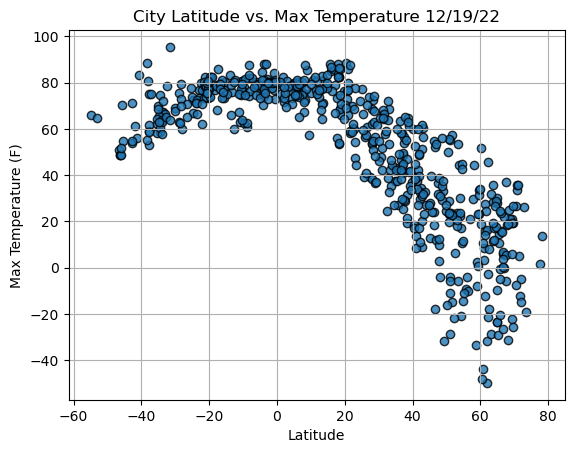

In [47]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

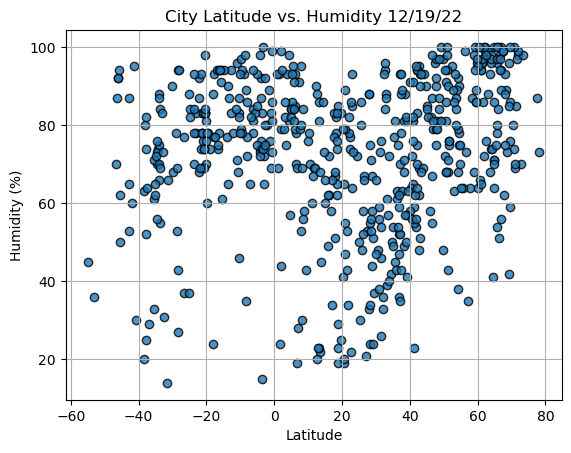

In [48]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

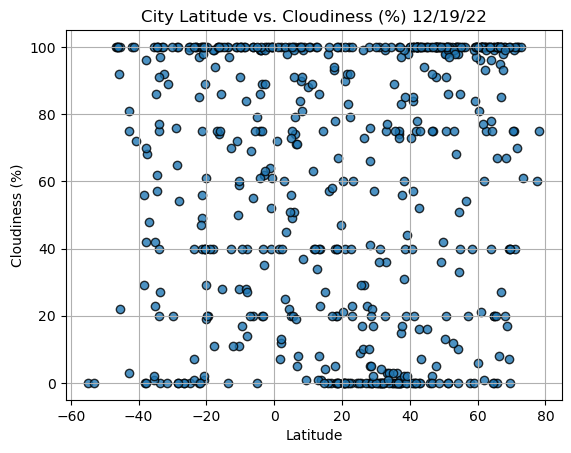

In [49]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

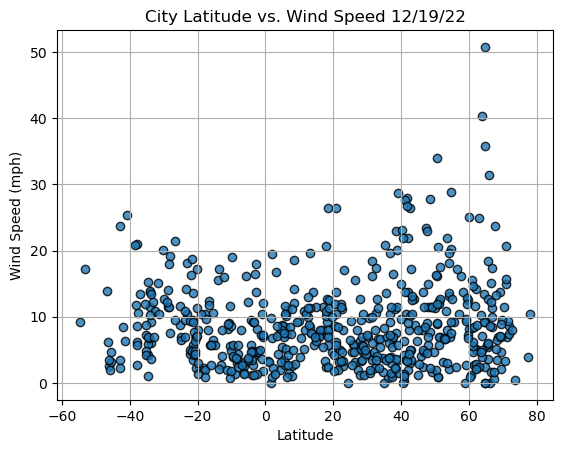

In [50]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()